In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [4]:
df = pd.read_csv("bank.csv")  

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Droping the ID and non-significant columns

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

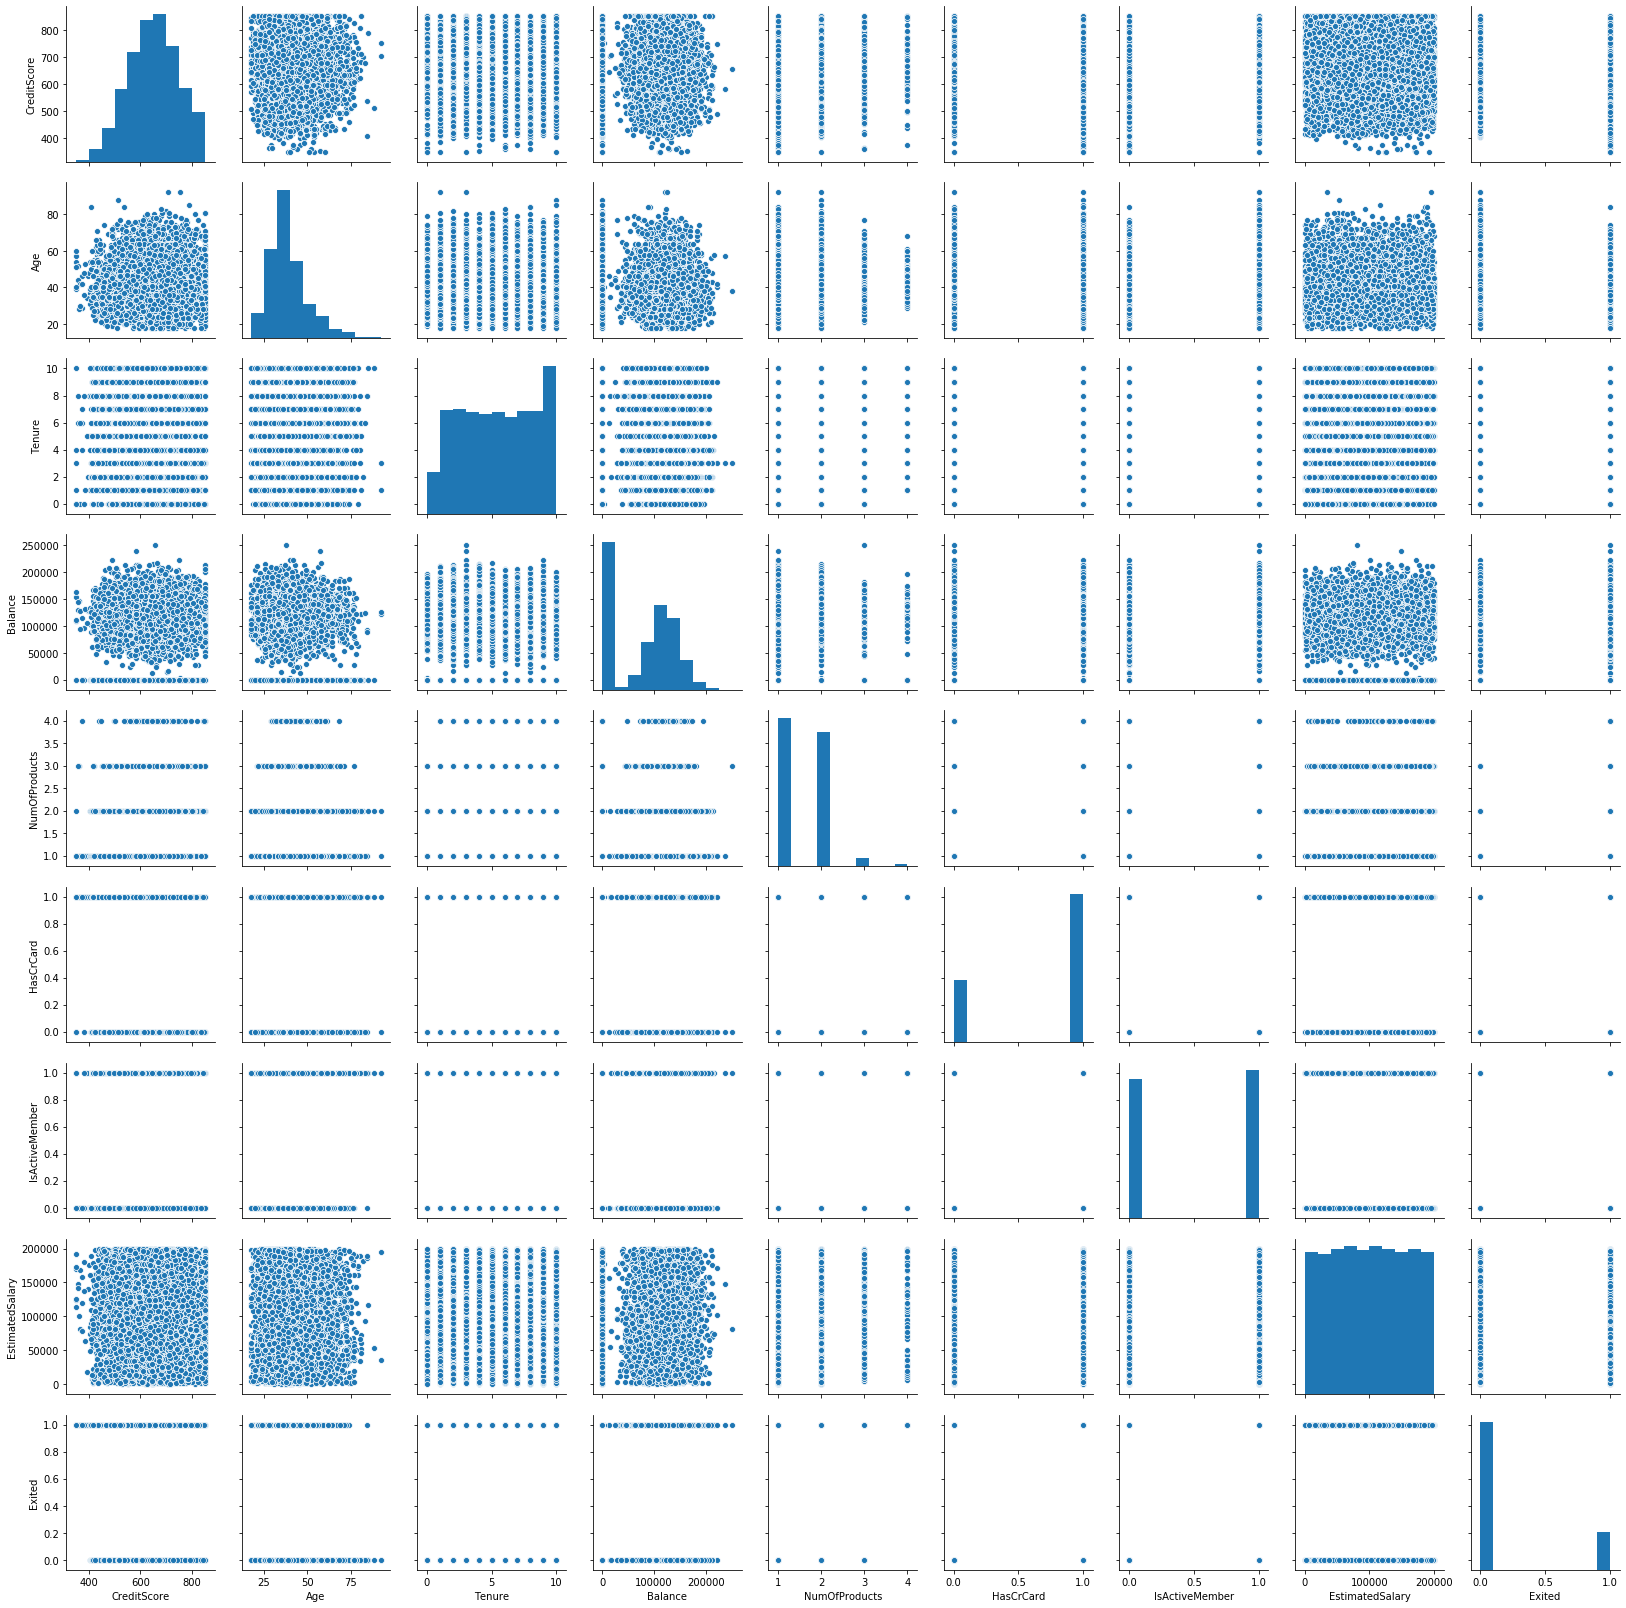

In [11]:
sns.pairplot(data=df)

Here we can see that the target variable "Exited" is unbalanced having high "0" value count. 

In [12]:
print(round((df['Exited'].sum()/df['Exited'].count())*100,2),'% Exited')

20.37 % Exited


Only 20.37% are positives, which is highly unbalanced. 

Separating input variables and target variable

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Performing one-hot encoding on categorical variables

In [16]:
X = pd.get_dummies(X, columns=['Geography','Gender'])

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [18]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [19]:
X.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

Splitting data into train and test. 

In [20]:
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

Normalising the data. 

In [21]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


Creating a deep neural network and preparing a model with Unbalanced dataset. 

In [23]:
model = Sequential()
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, batch_size = 700, epochs = 100, verbose = 1)

Train on 7000 samples
Epoch 1/100
7000/7000 [==============================] - 0s 46us/sample - loss: 0.6408 - accuracy: 0.6874
Epoch 2/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.5444 - accuracy: 0.7919
Epoch 3/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.5009 - accuracy: 0.7924
Epoch 4/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4794 - accuracy: 0.7929
Epoch 5/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4620 - accuracy: 0.7974
Epoch 6/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4476 - accuracy: 0.8037
Epoch 7/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4366 - accuracy: 0.8090
Epoch 8/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4275 - accuracy: 0.8121
Epoch 9/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.4199 - accuracy: 0.8166
Epoch 10/100
7000/7000 [========

7000/7000 [==============================] - 0s 2us/sample - loss: 0.3132 - accuracy: 0.8679
Epoch 79/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3128 - accuracy: 0.8684
Epoch 80/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3124 - accuracy: 0.8689
Epoch 81/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3116 - accuracy: 0.8691
Epoch 82/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3113 - accuracy: 0.8707
Epoch 83/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3105 - accuracy: 0.8703
Epoch 84/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3104 - accuracy: 0.8691
Epoch 85/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3096 - accuracy: 0.8701
Epoch 86/100
7000/7000 [==============================] - 0s 2us/sample - loss: 0.3094 - accuracy: 0.8697
Epoch 87/100
7000/7000 [==============================] - 0

In [27]:
results = model.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 53us/sample - loss: 0.3352 - accuracy: 0.8683


In [28]:
print(model.metrics_names)
print(results)  

['loss', 'accuracy']
[0.33515385500590006, 0.86833334]


In [29]:
Y_pred_cls = model.predict_classes(X_test, batch_size=700, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

3000/3000 [==============================] - 0s 15us/sample - loss: 0.3352 - accuracy: 0.8683
Accuracy Model1 (Dropout): 0.86833334
Recall_score: 0.4948630136986301
Precision_score: 0.7429305912596401
F-score: 0.5940390544707091


array([[2316,  100],
       [ 295,  289]], dtype=int64)

Using Synthetic Minority Over Sampling Technique (SMOTE) technique to balance the data. 

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.7, random_state=42)   
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Creating model using balanced data

In [155]:
model_balanced1 = Sequential()
model_balanced1.add(Dense(64, input_shape = (13,), activation = 'relu'))
model_balanced1.add(Dense(32, activation = 'relu'))
model_balanced1.add(Dense(1, activation = 'sigmoid'))

In [156]:
model_balanced1.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [157]:
model_balanced1.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_136 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [158]:
model_balanced1.fit(X_train_res, y_train_res, batch_size = 700, epochs = 50, verbose = 1)

Train on 9429 samples
Epoch 1/50
9429/9429 [==============================] - 0s 41us/sample - loss: 0.6132 - accuracy: 0.6563
Epoch 2/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.5135 - accuracy: 0.7482
Epoch 3/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4690 - accuracy: 0.7763
Epoch 4/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4408 - accuracy: 0.7929
Epoch 5/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4289 - accuracy: 0.8031
Epoch 6/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4226 - accuracy: 0.8066
Epoch 7/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4175 - accuracy: 0.8097
Epoch 8/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4134 - accuracy: 0.8120
Epoch 9/50
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4093 - accuracy: 0.8134
Epoch 10/50
9429/9429 [==================

In [159]:
results = model_balanced1.evaluate(X_test, y_test)

3000/3000 [==============================] - 0s 41us/sample - loss: 0.4101 - accuracy: 0.8147


In [160]:
Y_pred_cls = model_balanced1.predict_classes(X_test, batch_size=700, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model_balanced1.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
cm1 = confusion_matrix(y_test, Y_pred_cls)
print('Confusion Matrix:-')
print(cm1)
cr1=metrics.classification_report(y_test,Y_pred_cls)
print()
print('Classification Report:-')
print(cr1)

3000/3000 [==============================] - 0s 15us/sample - loss: 0.4101 - accuracy: 0.8147
Accuracy Model1 (Dropout): 0.8146667
Recall_score: 0.660958904109589
Precision_score: 0.5188172043010753
F-score: 0.5813253012048192
Confusion Matrix:-
[[2058  358]
 [ 198  386]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2416
           1       0.52      0.66      0.58       584

    accuracy                           0.81      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.84      0.81      0.82      3000



The unbalanced model has high accuracy but very poor recall score which means that the sensitivity to detect customer that are going to leave is very low. The balanced model comparatively has less accuracy but has a better recall score.  

Now trying different parameter values to build the model. Trying with different neuron counts and 'tanh' activation function in the output neuron. 

In [161]:
model_balanced2 = Sequential()
sgd = optimizers.Adam(lr = 0.001)
model_balanced2.add(Dense(32, input_shape = (13,), activation = 'relu'))
model_balanced2.add(Dense(32, activation = 'relu'))
model_balanced2.add(Dense(1, activation = 'tanh'))
model_balanced2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
model_balanced2.fit(X_train_res, y_train_res, batch_size = 700, epochs = 200, verbose = 1)


Train on 9429 samples
Epoch 1/200
9429/9429 [==============================] - 0s 41us/sample - loss: 2.3827 - accuracy: 0.6111
Epoch 2/200
9429/9429 [==============================] - 0s 2us/sample - loss: 1.1813 - accuracy: 0.6214
Epoch 3/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.8007 - accuracy: 0.5933
Epoch 4/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.7304 - accuracy: 0.5790
Epoch 5/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.6973 - accuracy: 0.5904
Epoch 6/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.6705 - accuracy: 0.6149
Epoch 7/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.6552 - accuracy: 0.6389
Epoch 8/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.6473 - accuracy: 0.6482
Epoch 9/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.6368 - accuracy: 0.6573
Epoch 10/200
9429/9429 [========

9429/9429 [==============================] - 0s 2us/sample - loss: 0.4429 - accuracy: 0.7839
Epoch 79/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4415 - accuracy: 0.7856
Epoch 80/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4422 - accuracy: 0.7856
Epoch 81/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4402 - accuracy: 0.7868
Epoch 82/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4389 - accuracy: 0.7861
Epoch 83/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4379 - accuracy: 0.7878
Epoch 84/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4369 - accuracy: 0.7876
Epoch 85/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4360 - accuracy: 0.7879
Epoch 86/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.4352 - accuracy: 0.7892
Epoch 87/200
9429/9429 [==============================] - 0

9429/9429 [==============================] - 0s 2us/sample - loss: 0.3862 - accuracy: 0.8144
Epoch 155/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3849 - accuracy: 0.8162
Epoch 156/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3845 - accuracy: 0.8148
Epoch 157/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3833 - accuracy: 0.8145
Epoch 158/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3825 - accuracy: 0.8171
Epoch 159/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3823 - accuracy: 0.8163
Epoch 160/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3815 - accuracy: 0.8169
Epoch 161/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3816 - accuracy: 0.8167
Epoch 162/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.3807 - accuracy: 0.8157
Epoch 163/200
9429/9429 [==========================

In [162]:
Y_pred_cls = model_balanced2.predict_classes(X_test, batch_size=700, verbose=0)
print('Accuracy Model2 (Dropout): '+ str(model_balanced2.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
cm2 = confusion_matrix(y_test, Y_pred_cls)
print('Confusion Matrix:-')
print(cm1)
cr2=metrics.classification_report(y_test,Y_pred_cls)
print()
print('Classification Report:-')
print(cr2)

3000/3000 [==============================] - 0s 50us/sample - loss: 0.5796 - accuracy: 0.8077
Accuracy Model2 (Dropout): 0.80766666
Recall_score: 0.6472602739726028
Precision_score: 0.5046728971962616
F-score: 0.5671417854463615
Confusion Matrix:-
[[2058  358]
 [ 198  386]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2416
           1       0.50      0.65      0.57       584

    accuracy                           0.81      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.81      0.82      3000



In [113]:
cm2

array([[2033,  383],
       [ 201,  383]], dtype=int64)

Model 2 almost slightly precision,recall and f1-score as model 1. 

Trying different loss function and EPOCHs. 

In [150]:
model_balanced3 = Sequential()
sgd = optimizers.Adam(lr = 0.001)
model_balanced3.add(Dense(64, input_shape = (13,), activation = 'relu'))
model_balanced3.add(Dense(64, activation = 'relu'))
model_balanced3.add(Dense(1, activation = 'sigmoid'))
model_balanced3.compile(optimizer = sgd, loss = tf.keras.losses.mean_squared_error, metrics=['accuracy'])
model_balanced3.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_133 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [151]:
model_balanced3.fit(X_train_res, y_train_res, batch_size = 700, epochs = 200, verbose = 1)

Train on 9429 samples
Epoch 1/200
9429/9429 [==============================] - 0s 33us/sample - loss: 0.2335 - accuracy: 0.6091
Epoch 2/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.2023 - accuracy: 0.6928
Epoch 3/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1879 - accuracy: 0.7204
Epoch 4/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1799 - accuracy: 0.7301
Epoch 5/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1741 - accuracy: 0.7424
Epoch 6/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1688 - accuracy: 0.7529
Epoch 7/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1635 - accuracy: 0.7590
Epoch 8/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1583 - accuracy: 0.7665
Epoch 9/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1534 - accuracy: 0.7790
Epoch 10/200
9429/9429 [========

9429/9429 [==============================] - 0s 2us/sample - loss: 0.1049 - accuracy: 0.8633
Epoch 79/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1053 - accuracy: 0.8630
Epoch 80/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1047 - accuracy: 0.8649
Epoch 81/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1041 - accuracy: 0.8634
Epoch 82/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1032 - accuracy: 0.8690
Epoch 83/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1033 - accuracy: 0.8665
Epoch 84/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1026 - accuracy: 0.8652
Epoch 85/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1028 - accuracy: 0.8654
Epoch 86/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.1017 - accuracy: 0.8700
Epoch 87/200
9429/9429 [==============================] - 0

9429/9429 [==============================] - 0s 2us/sample - loss: 0.0807 - accuracy: 0.9031
Epoch 155/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0804 - accuracy: 0.9055
Epoch 156/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0799 - accuracy: 0.9062
Epoch 157/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0800 - accuracy: 0.9039
Epoch 158/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0797 - accuracy: 0.9062
Epoch 159/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0791 - accuracy: 0.9053
Epoch 160/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0788 - accuracy: 0.9070
Epoch 161/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0790 - accuracy: 0.9056
Epoch 162/200
9429/9429 [==============================] - 0s 2us/sample - loss: 0.0787 - accuracy: 0.9059
Epoch 163/200
9429/9429 [==========================

In [153]:
Y_pred_cls = model_balanced3.predict_classes(X_test, batch_size=700, verbose=0)
print('Accuracy Model2 (Dropout): '+ str(model_balanced3.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
cm3 = confusion_matrix(y_test, Y_pred_cls)
print('Confusion Matrix:-')
print(cm3)
cr3=metrics.classification_report(y_test,Y_pred_cls)
print()
print('Classification Report:-')
print(cr3)

3000/3000 [==============================] - 0s 17us/sample - loss: 0.1377 - accuracy: 0.8077
Accuracy Model2 (Dropout): 0.80766666
Recall_score: 0.6386986301369864
Precision_score: 0.5047361299052774
F-score: 0.563869992441421
Confusion Matrix:-
[[2050  366]
 [ 211  373]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2416
           1       0.50      0.64      0.56       584

    accuracy                           0.81      3000
   macro avg       0.71      0.74      0.72      3000
weighted avg       0.83      0.81      0.82      3000



Here with different loss function and high EPOCHS we can see that the training is having very high accuracy along with very low loss value. However, on the test data, the accuracy is only 81% with 0.56 F1 score. 

## Conclusion

Overall, model 2 achieved almost similar results as model 1 in terms of recall, precision and F1 score. Howover, model 2 got training almost similar training and test accuracies which means it is the least overfitting model. 
Unfortunately the precision is on the lower side which means model 2 is likely to predict false positives but recall is comparatively better than most of the other models which means this model is more likely to detect True positives. 

Model 2 received significant improvements in recall and F1 score by balancing the data with respect to the target variable using SMOTE technique. Overfitting was reduced by using lesser number of first inner layer neurons (reduced from 64 to 32). 
Model 2 achieved overall accuracy of around 81% on training data. 

Recall was focused more considering the business impact on the bank loosing customers. 